In [13]:
#Расчет переливов ликвидности на примере одной бумаги - ALRS
import pandas as pd
df = pd.read_excel(r'C:\Users\User\Desktop\alrs.xlsx',engine='openpyxl')
finalDf = df.set_index('TIME')
finalDf

,principal component 1,principal component 2
TIME,,
2015-03-04 10:00:00,7.176269,5.919529
2015-03-04 10:01:00,7.773778,3.230125
2015-03-04 10:02:00,3.469468,1.591506
2015-03-04 10:03:00,1.653437,0.914868
2015-03-04 10:04:00,1.283072,0.566020
...,...,...
2015-03-04 18:36:00,-2.403218,1.633894
2015-03-04 18:37:00,-2.681491,1.523453
2015-03-04 18:38:00,-1.809859,1.962247


In [14]:
#Разница между значениями PCA (velocity) для Альросы
#Убрать NaN значения
delta_PCA = finalDf.diff()
delta_PCA.fillna(0, inplace=True)
delta_PCA.head(100)

,principal component 1,principal component 2
TIME,,
2015-03-04 10:00:00,0.000000,0.000000
2015-03-04 10:01:00,0.597510,-2.689404
2015-03-04 10:02:00,-4.304310,-1.638619
2015-03-04 10:03:00,-1.816031,-0.676638
2015-03-04 10:04:00,-0.370365,-0.348847
...,...,...
2015-03-04 11:35:00,1.918973,0.651010
2015-03-04 11:36:00,-0.342712,-0.139616
2015-03-04 11:37:00,-1.477762,-0.587901


<ipython-input-15-da8c17e391df>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])


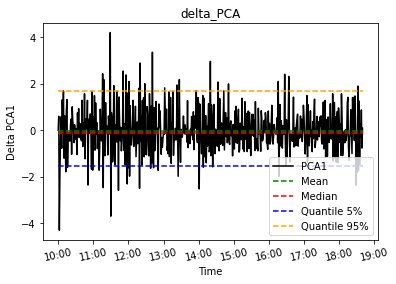

In [15]:
#Визуализация delta_PCA для 1 бумаги - Альроса
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('delta_PCA')
plt.plot(delta_PCA.index, delta_PCA['principal component 1'], color='black', label='PCA1')
plt.plot(delta_PCA.index, [np.mean(delta_PCA['principal component 1']) for i in range(len(delta_PCA['principal component 1']))], label='Mean', color='green', linestyle='--')
plt.plot(delta_PCA.index, [np.median(delta_PCA['principal component 1']) for i in range(len(delta_PCA['principal component 1']))], label='Median', color='red', linestyle='--')
plt.plot(delta_PCA.index, [np.quantile(delta_PCA['principal component 1'], 0.05) for i in range(len(delta_PCA['principal component 1']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(delta_PCA.index, [np.quantile(delta_PCA['principal component 1'], 0.95) for i in range(len(delta_PCA['principal component 1']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='Delta PCA1')
plt.legend(loc = 'best')
plt.xticks(rotation=12)
ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])
plt.show()

In [16]:
#Отобрать значения дельта PCA, где дельта PCA превышает 95% персентиль для Альросы
T = delta_PCA.loc[delta_PCA['principal component 1']>=1.81]
T1 = T[['principal component 1']].reset_index('TIME')
T1

,TIME,principal component 1
0,2015-03-04 11:16:00,2.429713
1,2015-03-04 11:18:00,2.176370
2,2015-03-04 11:29:00,4.202299
3,2015-03-04 11:35:00,1.918973
4,2015-03-04 11:51:00,2.544454
5,2015-03-04 11:56:00,2.378980
6,2015-03-04 12:01:00,2.092834
7,2015-03-04 12:20:00,2.892264
8,2015-03-04 12:28:00,1.999906
9,2015-03-04 12:41:00,3.354152


In [17]:
#Нахождение разницы во времени между моментом события и 100000000
from datetime import timedelta
t= T1['TIME']
time_delta = pd.to_datetime(t, format='%H%M%S%f')- pd.to_datetime(100000000,format = '%H%M%S%f')
event_times = time_delta-timedelta(days=42065)
event_times

0    0 days 01:16:00
1    0 days 01:18:00
2    0 days 01:29:00
3    0 days 01:35:00
4    0 days 01:51:00
5    0 days 01:56:00
6    0 days 02:01:00
7    0 days 02:20:00
8    0 days 02:28:00
9    0 days 02:41:00
10   0 days 03:02:00
11   0 days 03:23:00
12   0 days 03:27:00
13   0 days 04:20:00
14   0 days 04:33:00
15   0 days 04:51:00
16   0 days 06:16:00
17   0 days 06:27:00
18   0 days 06:34:00
19   0 days 08:32:00
Name: TIME, dtype: timedelta64[ns]

In [19]:
#Перевести время с момента 100000000 в минуты
times = []
for t in event_times:
    times.append(t.seconds//60)
print(times)
#Нужно преобразование чисел в списке в формат float для расчета параметров процесса Хоукса
new_list = []
for item in times:
    new_list.append(float(item))
new_list

[76, 78, 89, 95, 111, 116, 121, 140, 148, 161, 182, 203, 207, 260, 273, 291, 376, 387, 394, 512]


[76.0,
 78.0,
 89.0,
 95.0,
 111.0,
 116.0,
 121.0,
 140.0,
 148.0,
 161.0,
 182.0,
 203.0,
 207.0,
 260.0,
 273.0,
 291.0,
 376.0,
 387.0,
 394.0,
 512.0]

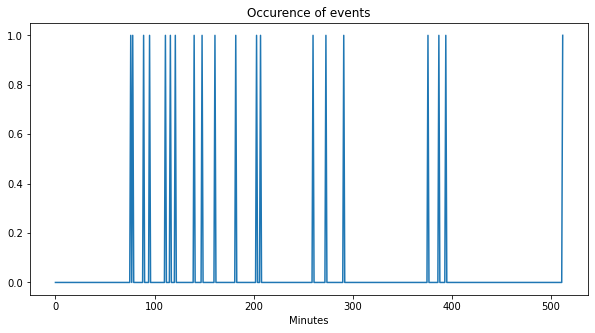

In [20]:
# Время возникновения событий
import numpy as np
import matplotlib.pyplot as plt

bc = np.bincount(np.floor(times).astype(int))

plt.figure(figsize=(10,5))
plt.title("Occurence of events")
plt.xlabel("Minutes")
plt.plot(bc[:530])

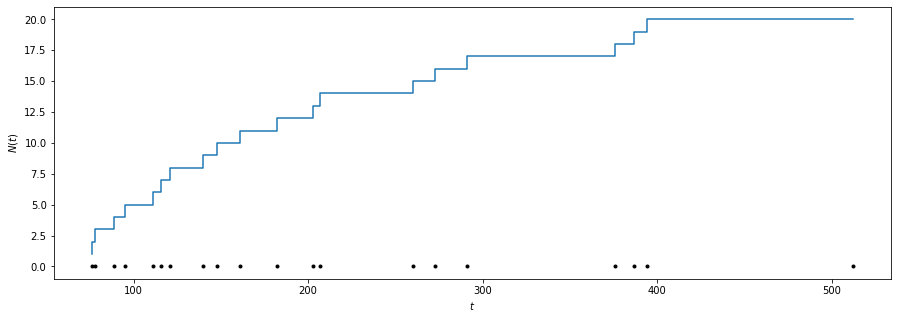

In [21]:
#Counting process N(t)/Процесс счета
ar_pp = sorted(times)
f = plt.figure(figsize=(15,5))

plt.step(ar_pp, np.cumsum(np.ones_like(ar_pp)))
plt.ylabel("$N(t)$")
plt.xlabel('$t$')
_ = plt.plot(ar_pp, np.zeros_like(ar_pp), 'k.')

In [22]:
import Hawkes as hk
import numpy as np
itv = [0,520] # the observation interval
T = np.array(new_list) # sample data
model = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const').set_data({'T':T}, itv)
model.fit(T,itv) # T is the event times (numpy.ndarray)
print("parameter:",model.parameter) # the estimated parameter values
print("branching ratio:",model.br) # the branching ratio
print("log-likelihood:",model.L) # the log-likelihood of the estimated parameter values
print("AIC:",model.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 0.02208579942120507, 'alpha': array([0.18978173, 0.25325416]), 'beta': array([0.03552478, 0.03552364])}
branching ratio: 0.44303588876809463
log-likelihood: -84.16055726956827
AIC: 174.32111453913654


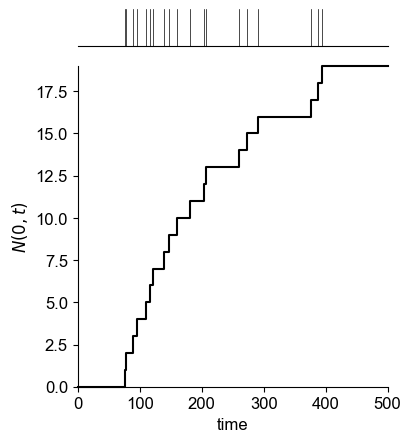

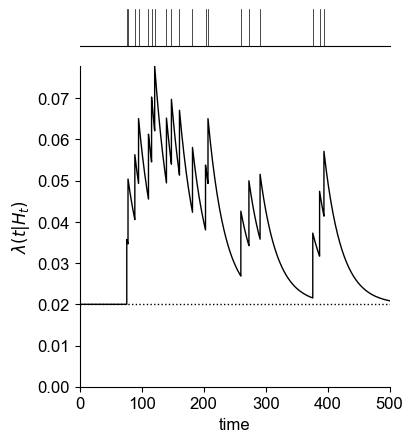

In [23]:
#Здесь задана интенсивность в обычном виде с двойной экспоненциальной функцией 𝜆(𝑡|𝐻𝑡)=𝜇(𝑡)+∑𝑡𝑖<𝑡𝑓(𝑡−𝑡𝑖)
import numpy as np
import Hawkes as hk

para = {"mu":0.02, "alpha":[0.18978173, 0.25325416], "beta":[0.03552478, 0.03552364]}
itv = [0,500]
T = np.array(times)
model = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const').set_parameter(para).set_data({'T':T}, itv)
model.plot_N() # the figure of N(0,T)
model.plot_l() # the figure of time vs conditional intensity function

In [24]:
[T_trans, itv_trans] = model.t_trans()
time = model.t_trans()
time

[array([ 1.52      ,  1.59038476,  2.08716627,  2.40333901,  3.2734433 ,
         3.56250426,  3.8928971 ,  5.07212981,  5.54683436,  6.32481945,
         7.44171303,  8.42514261,  8.63115259, 10.76647145, 11.26171404,
        12.02034441, 14.56520807, 14.94254024, 15.25252849]),
 [0, 18.393481698670783]]

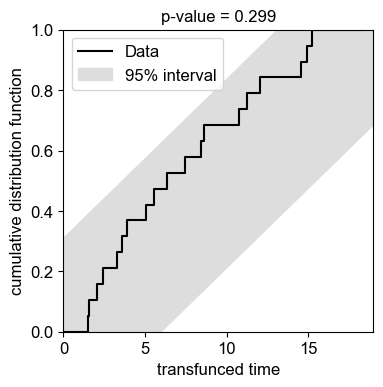

In [25]:
#График для теста Колмогорова-Смирнова
model.plot_KS()